In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,76
1,117
2,10
3,118
4,2
...,...
1915,85
1916,58
1917,47
1918,48


In [5]:
def smoothed(data):
    # Apply moving average filter to smooth the forecasted values
    window_size = 5  # You can adjust the window size as needed
    forecast_smoothed = data.rolling(window=window_size).mean()

    # Interpolate NaN values resulting from the moving average
    forecast_smoothed_interpolated = forecast_smoothed.interpolate()

    # Fill remaining NaN values
    forecast_smoothed_filled = forecast_smoothed_interpolated.fillna(method='bfill')  # or 'ffill', or use fillna(value=0)
    
    return forecast_smoothed_filled

# Example usage
data = smoothed(data)


<Axes: >

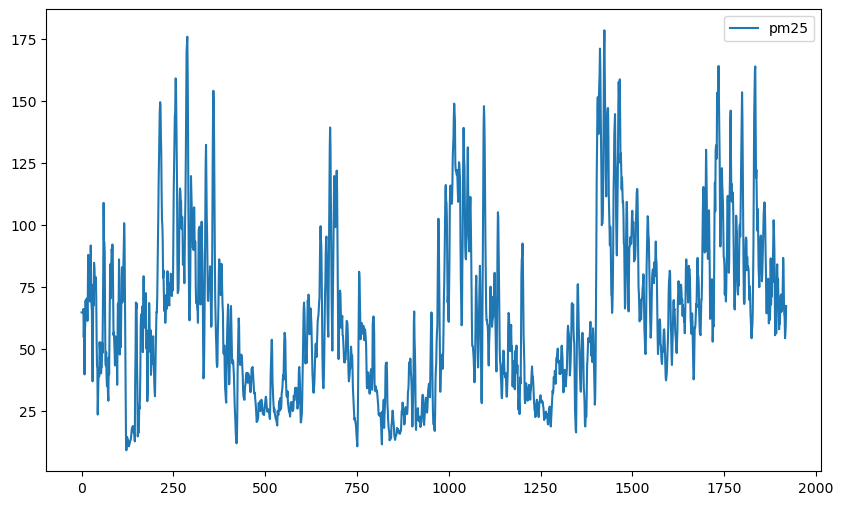

In [6]:
data.plot(figsize=(10,6))

In [7]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1728
Test data size: 192


In [8]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12220.212, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11703.562, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11771.046, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12218.248, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11694.849, Time=0.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11694.497, Time=0.91 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=11594.033, Time=0.90 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=11279.497, Time=1.89 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=11218.063, Time=3.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=11480.660, Time=3.07 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.92 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=11177.161, Time=8.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11538.521, Time=3.88 sec
 ARIMA(4,1,3)(0,0,0)[0] interce

ARIMA(order=(4, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [9]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [10]:
y_pred = pd.DataFrame(y_pred, columns=['pm25'])
y_pred = smoothed(y_pred)
y_pred = y_pred.to_numpy()

In [11]:
# 4. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+91, step=1)

# Tạo mảng 90 ngày 
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# # In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[132.3729079  120.21555718 123.16987476 133.72141511 133.06922839
 126.39522445 125.7000873  128.57771494 128.43907239 126.81814229
 127.28465534 128.56446882 128.42792124 127.67302636 127.67534064
 128.01898057 127.9524714  127.74569269 127.81545763 127.96670566
 127.94105258 127.85588775 127.8663042  127.90716272 127.89385777
 127.86840673 127.87851341 127.89600683 127.89163359 127.88207098
 127.88448701 127.88929268 127.88712252 127.88408525 127.88551594
 127.8875     127.88680756 127.88574223 127.88616342 127.88671975
 127.8863971  127.88604482 127.88624343 127.8864641  127.88636042
 127.88624314 127.88630819 127.8863713  127.88632581 127.88628609
 127.88631317 127.88633719 127.88632233 127.88630963 127.88631901
 127.886326   127.8863198  127.88631546 127.88631909 127.88632164
 127.88631958 127.88631824 127.88631953 127.88632028 127.88631946
 127.886319   127.88631948 127.88631974 127.88631946 127.88631933
 127.8863195  127.88631957 12

In [12]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 44.69006041530208

Testing MAPE: 52.8789808029416

MAE: 40.50435611289404


In [13]:
test_data.index

RangeIndex(start=1728, stop=1920, step=1)

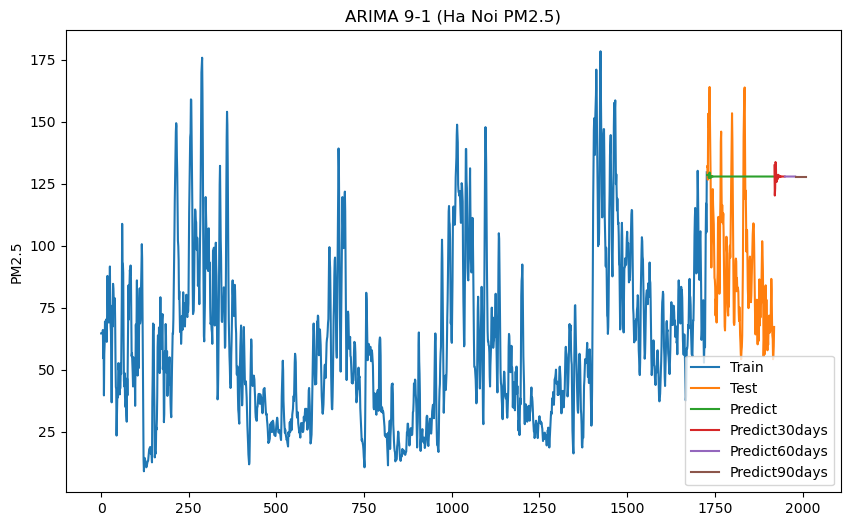

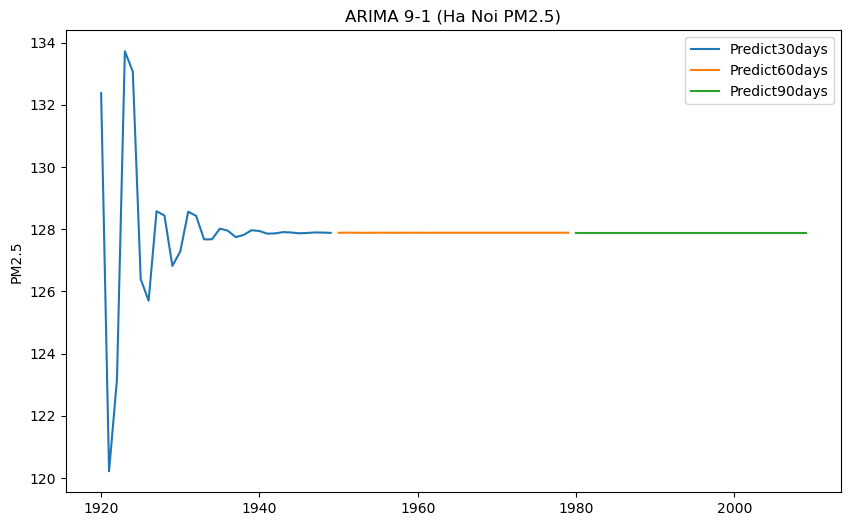

In [14]:
# 9.Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
plt.figure(figsize=(10, 6))
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_90_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_90_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_90_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 9-1 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

